## 5주 서울시 자전거 대여건수 과제 - 201810803 장서령 
#### 문제: 년별 분기별 대여건수
서울시 열린데이터 https://data.seoul.go.kr/ 에서 제공하는 ```서울특별시_공공자전거 일별 대여건수_(2018~2019.03).csv```를 분석해보자.
파일은 웹 검색을 해서 다운로드해서 사용하면 된다.
데이터는 일자별로, 대여건수이이고, 몇 줄만 출력해보면 다음과 같다.

|      date| count|
|----------|------|
|2018-01-01|  4950|
|2018-01-02|  7136|
|2018-01-03|  7156|
|2018-01-04|  7102|
|2018-01-05|  7705|


#### 문제 1-1: 년도별 대여건수 합계
데이터는 2018, 2019년 15개월 간의 대여건수이다. 년도별로 대여건수의 합계를 계산해서 출력하자.

|year|sum(count)|
|----|----------|
|2018|  10124874|
|2019|   1871935|


#### 문제 1-2: 년도별, 월별 대여건수 합계
년별, 월별로 대여건수를 계산하여 합계를 계산하여 출력한다.

#### 문제 1-3: 년도별, 월별 대여건수 그래프
문제 1-2의 출력을 선 그래프로 그려보자.

In [2]:
import os
import pyspark
import requests
import pandas as pd

from pyspark.sql import Row
from pyspark.sql.types import DateType
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")

os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"
myConf=pyspark.SparkConf()
spark=pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).getOrCreate()

In [3]:
%fs
ls /FileStore/tables/

path,name,size
dbfs:/FileStore/tables/경기도_의정부시_인구현황_20200904.csv,경기도_의정부시_인구현황_20200904.csv,1762
dbfs:/FileStore/tables/서울특별시_공공자전거_일별_대여건수__2018_2019_03_.csv,서울특별시_공공자전거_일별_대여건수__2018_2019_03_.csv,8128
dbfs:/FileStore/tables/제주특별자치도_서귀포시_고령화비율및노령화지수현황_20200623.csv,제주특별자치도_서귀포시_고령화비율및노령화지수현황_20200623.csv,532


In [4]:
df = spark.read.format('com.databricks.spark.csv').options(header='true', inferschema='true', delimiter=',').load(os.path.join("/FileStore/tables","서울특별시_공공자전거_일별_대여건수__2018_2019_03_.csv"))

In [5]:
df.printSchema()
df.columns

root
-- 대여일자: string (nullable = true)
-- 대여건수: integer (nullable = true)

Out[132]: ['대여일자', '대여건수']

In [6]:
df=df.withColumn("date",df['대여일자'].cast("string"))
df=df.withColumn("count",df['대여건수'].cast("integer"))

In [7]:
df.printSchema()

root
-- 대여일자: string (nullable = true)
-- 대여건수: integer (nullable = true)
-- date: string (nullable = true)
-- count: integer (nullable = true)

In [8]:
df=df.drop('대여일자').drop('대여건수')

In [9]:
df.printSchema()

root
-- date: string (nullable = true)
-- count: integer (nullable = true)

### 년별 분기별 대여건수

In [11]:
df.show(5)

+----------+-----+
 date|count|
+----------+-----+
2018-01-01| 4950|
2018-01-02| 7136|
2018-01-03| 7156|
2018-01-04| 7102|
2018-01-05| 7705|
+----------+-----+
only showing top 5 rows

### 1-1.연도별 대여건수 합계

In [13]:
from pyspark.sql.functions import split
split_col = split(df['date'], '-')

In [14]:
splitdf=df.withColumn('year', split_col.getItem(0))

In [15]:
splitdf.show()

+----------+-----+----+
 date|count|year|
+----------+-----+----+
2018-01-01| 4950|2018|
2018-01-02| 7136|2018|
2018-01-03| 7156|2018|
2018-01-04| 7102|2018|
2018-01-05| 7705|2018|
2018-01-06| 5681|2018|
2018-01-07| 5220|2018|
2018-01-08| 6309|2018|
2018-01-09| 5988|2018|
2018-01-10| 4476|2018|
2018-01-11| 4337|2018|
2018-01-12| 4401|2018|
2018-01-13| 3756|2018|
2018-01-14| 4675|2018|
2018-01-15| 6993|2018|
2018-01-16| 7421|2018|
2018-01-17| 6990|2018|
2018-01-18| 7054|2018|
2018-01-19| 8329|2018|
2018-01-20| 6148|2018|
+----------+-----+----+
only showing top 20 rows

In [16]:
yeardf=splitdf.groupBy('year').agg({"count":"sum"})
yeardf.sort("year").show()

+----+----------+
year|sum(count)|
+----+----------+
2018| 10124874|
2019| 1871935|
+----+----------+

### 1-2.연도별,월별 대여건수 합계

In [18]:
splitdf=df.withColumn('year', split_col.getItem(0))
splitdf=splitdf.withColumn('month', split_col.getItem(1))

In [19]:
splitdf.show()

+----------+-----+----+-----+
 date|count|year|month|
+----------+-----+----+-----+
2018-01-01| 4950|2018| 01|
2018-01-02| 7136|2018| 01|
2018-01-03| 7156|2018| 01|
2018-01-04| 7102|2018| 01|
2018-01-05| 7705|2018| 01|
2018-01-06| 5681|2018| 01|
2018-01-07| 5220|2018| 01|
2018-01-08| 6309|2018| 01|
2018-01-09| 5988|2018| 01|
2018-01-10| 4476|2018| 01|
2018-01-11| 4337|2018| 01|
2018-01-12| 4401|2018| 01|
2018-01-13| 3756|2018| 01|
2018-01-14| 4675|2018| 01|
2018-01-15| 6993|2018| 01|
2018-01-16| 7421|2018| 01|
2018-01-17| 6990|2018| 01|
2018-01-18| 7054|2018| 01|
2018-01-19| 8329|2018| 01|
2018-01-20| 6148|2018| 01|
+----------+-----+----+-----+
only showing top 20 rows

In [20]:
splitdf.groupBy('year').pivot('month').sum().sort("year").show()

+----+------+------+------+------+------+-------+-------+-------+-------+-------+------+------+
year| 01| 02| 03| 04| 05| 06| 07| 08| 09| 10| 11| 12|
+----+------+------+------+------+------+-------+-------+-------+-------+-------+------+------+
2018|164367|168741|462661|687885|965609|1207123|1100015|1037505|1447993|1420621|961532|500822|
2019|495573|471543|904819| null| null| null| null| null| null| null| null| null|
+----+------+------+------+------+------+-------+-------+-------+-------+-------+------+------+

### 1-3.연도별,월별 대여건수 그래프

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
monthsort=splitdf.groupBy('month').pivot('year').sum()
graph18=monthsort.select('month','2018').sort("month")
graph19=monthsort.select('month','2019').sort("month")

In [24]:
graph18_weigh=graph18.rdd.map(lambda fields:fields[0]).collect()
graph18_height=graph18.rdd.map(lambda fields:fields[1]).collect()

In [25]:
graph19_weigh=graph19.rdd.map(lambda fields:fields[0]).collect()
graph19_height=graph19.rdd.map(lambda fields:fields[1]).collect()

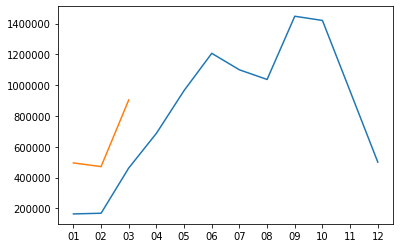

In [26]:
plt.plot(np.array(graph18_weigh),np.array(graph18_height))
plt.plot(np.array(graph19_weigh),np.array(graph19_height))